In [14]:
# Import the required modules
from scipy.io import arff
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
import statistics

In [15]:
# Function that gets data ready to work on

def manipulate_data(data):

    # Grab the class column
    try:
        x = data.drop('class', axis=1)
        y = data['class']
    except:
        x = data.drop('Class', axis=1)
        y = data['Class']

    y = y.apply(lambda x: x.decode('utf-8'))

    return {'x': x, 'y': y}

In [16]:
# Import the data sets for later use
ion_data, ion_meta = arff.loadarff('../data/ionosphere.arff')
bn_data, bn_meta = arff.loadarff('../data/banknotes.arff')
spf_data, spf_meta = arff.loadarff('../data/steel-plates-fault.arff')

# Convert to pandas dataframes
ion_df = pd.DataFrame(ion_data)
bn_df = pd.DataFrame(bn_data)
spf_df = pd.DataFrame(spf_data)

ion_data_ready = manipulate_data(ion_df)
bn_data_ready = manipulate_data(bn_df)
spf_data_ready = manipulate_data(spf_df)


In [17]:
# Function to draw the graphs

def draw_graphs(data, labels, x_label, title):

    # Plot the results in three separate box plots
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

    # Box plot for ionosphere dataset
    axes[0].boxplot(data["ion"])
    axes[0].set_title('Ionosphere')
    axes[0].set_xlabel(x_label)
    axes[0].set_ylabel('Accuracy')
    axes[0].set_xticklabels(labels)

    # Box plot for banknotes dataset
    axes[1].boxplot(data["bn"])
    axes[1].set_title('Banknotes')
    axes[1].set_xlabel(x_label)
    axes[1].set_xticklabels(labels)

    # Box plot for steel plates fault dataset
    axes[2].boxplot(data["spf"])
    axes[2].set_title('Steel Plates Fault')
    axes[2].set_xlabel(x_label)
    axes[2].set_xticklabels(labels)

    # Show the plot
    plt.suptitle(title)
    plt.show()

In [18]:
# split and scale the train and test sets

def split_data(data, i):

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(data['x'], data['y'], test_size=0.5, random_state=42 + i)

    # Scale the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return {'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test}


mean: 0.15000000000000002
mean: 0.002069970845481106
mean: 0.01886714727085481
mean: 0.12272727272727268
mean: 0.0017201166180758065
mean: 0.02440782698249233
mean: 0.16500000000000004
mean: 0.0018658892128280424
mean: 0.019938208032955762
mean: 0.14534090909090913
mean: 0.0016326530612245094
mean: 0.021688980432543747
mean: 0.17613636363636365
mean: 0.0019533527696793396
mean: 0.02352214212152426


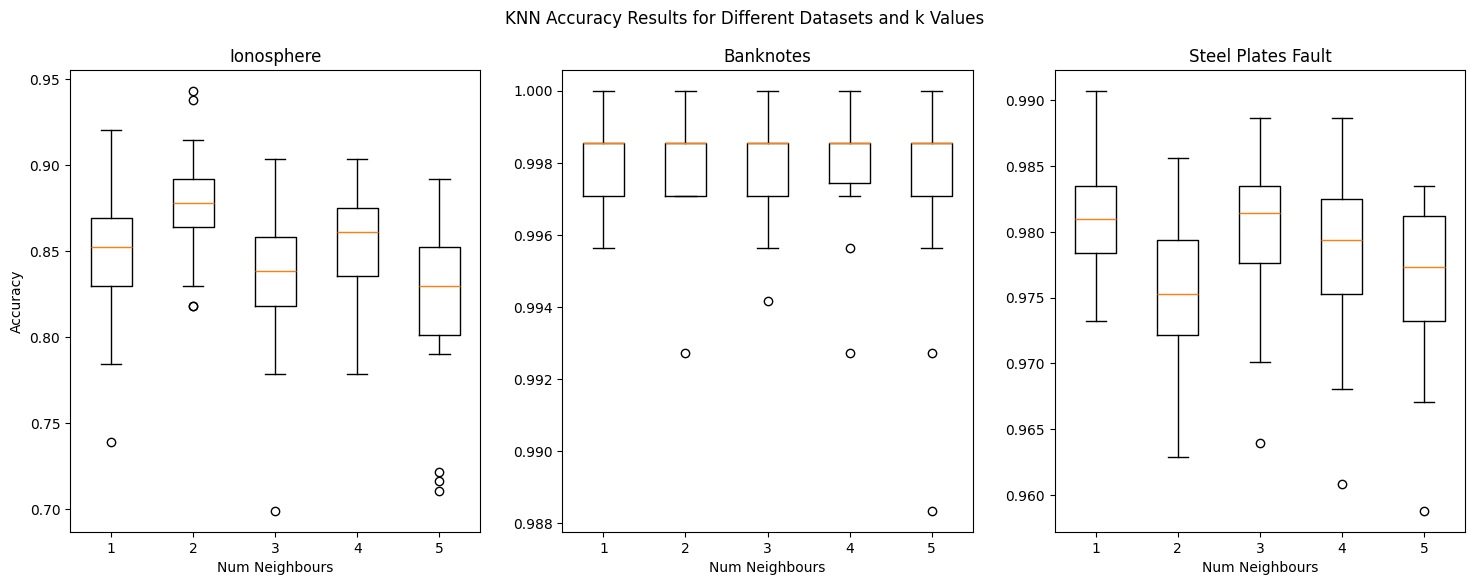

In [30]:
# implement KNN algo on the data sets

def knn(dataset, num_neighbours):

    predictions_list = []

    for i in range(50):

        # Prepare the data for training
        prepared_data = split_data(dataset, i)

        # Initialize the k-NN classifier
        knn = KNeighborsClassifier(n_neighbors=num_neighbours)

        # Train the model
        knn.fit(prepared_data['X_train'], prepared_data['y_train'])

        # Make predictions on the test set
        y_pred = knn.predict(prepared_data['X_test'])

        # Evaluate the model
        accuracy = accuracy_score(prepared_data['y_test'], y_pred)
        #print(f"Accuracy: {accuracy:.2f}")
        predictions_list.append(accuracy)

    predictions_list.sort()
    print('mean:', 1-statistics.mean(predictions_list), num_neighbours)
    return predictions_list

# Create lists to hold the results for later
ion_results = []
bn_results = []
spf_results = []

labels = [1, 2, 3, 4, 5]

# Populate the lists with results
for i in range (5):
    ion_results.append(knn(ion_data_ready, num_neighbours=i+1))
    bn_results.append(knn(bn_data_ready, num_neighbours=i+1))
    spf_results.append(knn(spf_data_ready, num_neighbours=i+1))


dict_results = {"ion": ion_results,
                "bn" : bn_results,
                "spf": spf_results}

draw_graphs(dict_results, labels, "Num Neighbours", "KNN Accuracy Results for Different Datasets and k Values")


mean: 0.12022727272727274
mean: 0.15775510204081633
mean: 0.002142121524201901
mean: 0.12102272727272723
mean: 0.15775510204081633
mean: 0.003274974253347107
mean: 0.14647727272727273
mean: 0.15854227405247812
mean: 0.0075180226570545905


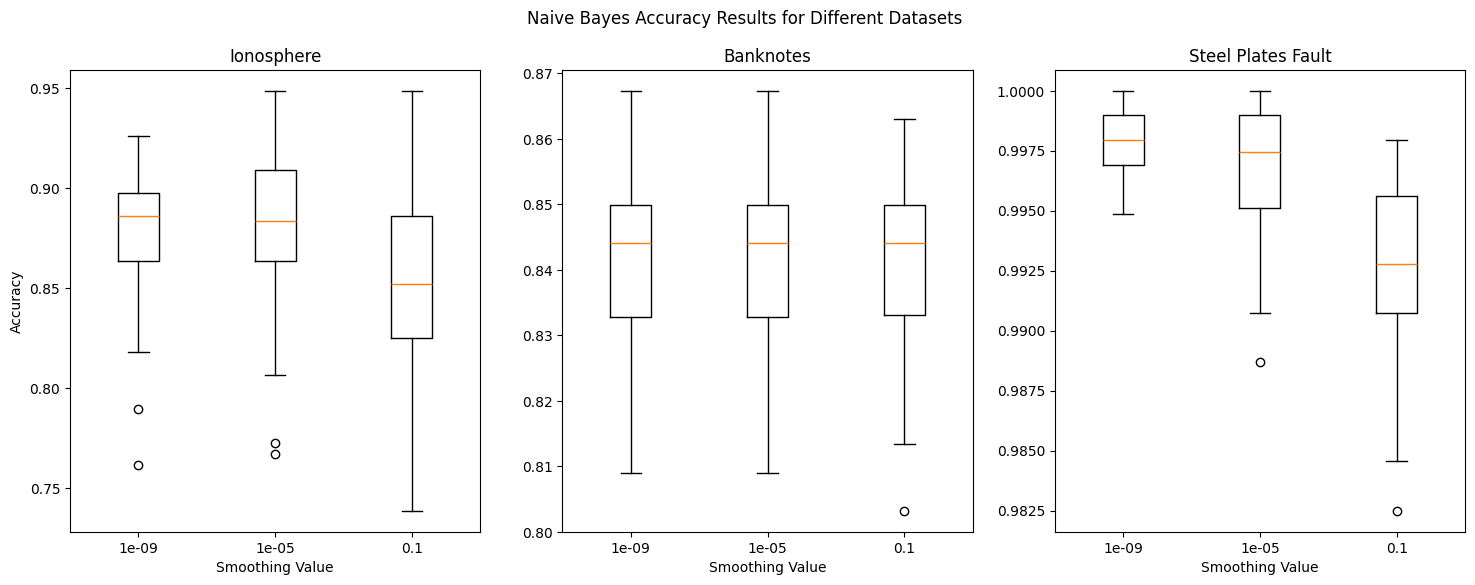

In [31]:
# Implement Naive Bayes on the data sets

def naive_bayes(data, var_smoothing_value):

    predictions_list = []

    for i in range(50):

        prepared_data = split_data(data, i)

        # Initialize the model
        nb = GaussianNB(var_smoothing=var_smoothing_value)

        # Train the model
        nb.fit(prepared_data['X_train'], prepared_data['y_train'])

        # Make predictions on test set
        y_pred = nb.predict(prepared_data['X_test'])

        # Evaluate the model
        accuracy = accuracy_score(prepared_data['y_test'], y_pred)
        predictions_list.append(accuracy)
    
    predictions_list.sort()
    print('mean:', 1-statistics.mean(predictions_list), var_smoothing_value)
    return predictions_list

    
# Create lists to hold the results for later
ion_results = []
bn_results = []
spf_results = []

# Define the var_smoothing hyperparameters
labels = [1e-9, 1e-5, 1e-1]

# Populate the lists with results
for label in labels:
    ion_results.append(naive_bayes(ion_data_ready, label))
    bn_results.append(naive_bayes(bn_data_ready, label))
    spf_results.append(naive_bayes(spf_data_ready, label))

dict_results = {"ion": ion_results,
                "bn" : bn_results,
                "spf": spf_results}

draw_graphs(dict_results, labels, 'Smoothing Value', 'Naive Bayes Accuracy Results for Different Datasets')


mean: 0.18715909090909089
mean: 0.15463556851311955
mean: 0.34883625128733264
mean: 0.12749999999999995
mean: 0.07005830903790089
mean: 0.14898043254376936
mean: 0.1219318181818182
mean: 0.02857142857142858
mean: 0.02980432543769307
mean: 0.1257954545454545
mean: 0.020408163265306145
mean: 0.0
mean: 0.12477272727272726
mean: 0.0208746355685131
mean: 0.0


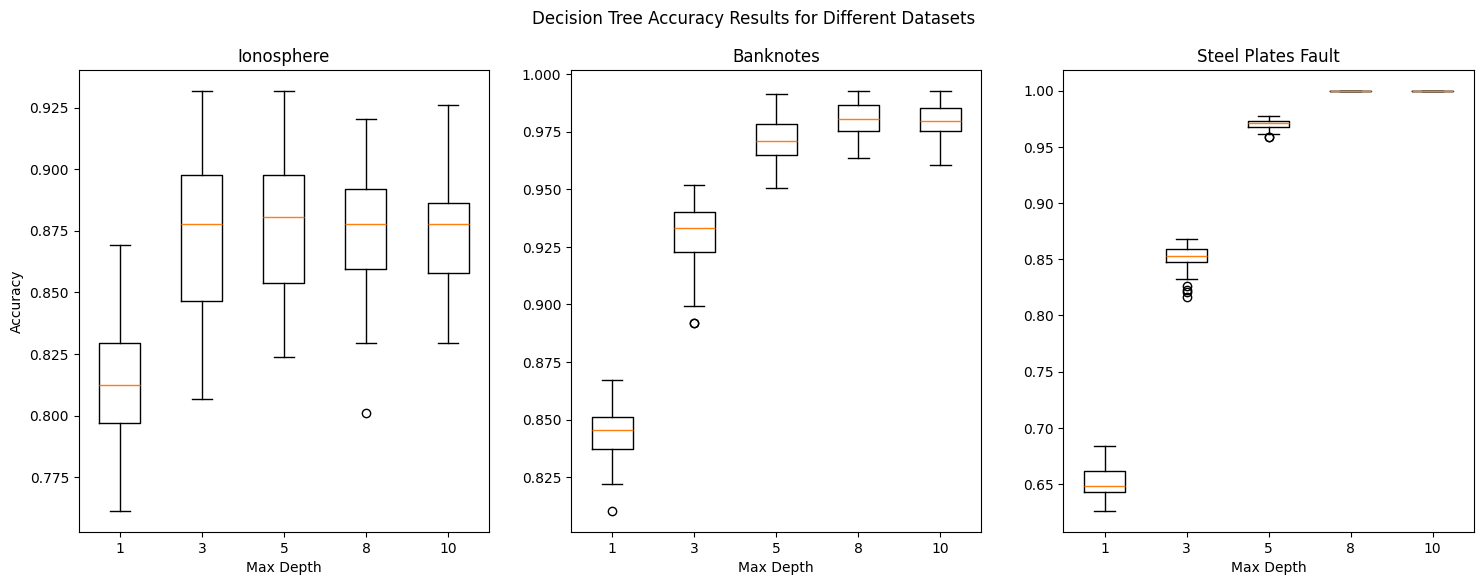

In [38]:
# Implement Decision Tree on the data sets

def decision_tree(data, max_depth):

    predictions_list = []

    for i in range(50):

        prepared_data = split_data(data, i)

        # Initialize the Decision Tree classifier
        dt = DecisionTreeClassifier(max_depth=max_depth)

        # Train the model
        dt.fit(prepared_data['X_train'], prepared_data['y_train'])

        # Make predictions on the test set
        y_pred = dt.predict(prepared_data['X_test'])

        # Evaluate the model
        accuracy = accuracy_score(prepared_data['y_test'], y_pred)
        predictions_list.append(accuracy)

    predictions_list.sort()
    print('mean:', 1-statistics.mean(predictions_list), max_depth)
    return predictions_list

# Create lists to hold the results for later
ion_results = []
bn_results = []
spf_results = []

labels = [1, 3, 5, 8, 10]

# Populate the lists with results
for label in labels:
    ion_results.append(decision_tree(ion_data_ready, label))
    bn_results.append(decision_tree(bn_data_ready, label))
    spf_results.append(decision_tree(spf_data_ready, label))

dict_results = {"ion": ion_results,
                "bn" : bn_results,
                "spf": spf_results}

draw_graphs(dict_results, labels, 'Max Depth', 'Decision Tree Accuracy Results for Different Datasets')


mean: 0.12624999999999997
mean: 0.02795918367346939
mean: 0.0010092687950566948
mean: 0.12375000000000003
mean: 0.020758017492711334
mean: 0.0008032955715756573
mean: 0.12534090909090911
mean: 0.019416909620991296
mean: 0.0008032955715756573
mean: 0.12602272727272723
mean: 0.01830903790087468
mean: 0.0007003089598351941
mean: 0.12624999999999997
mean: 0.01545189504373179
mean: 0.0006591143151389867


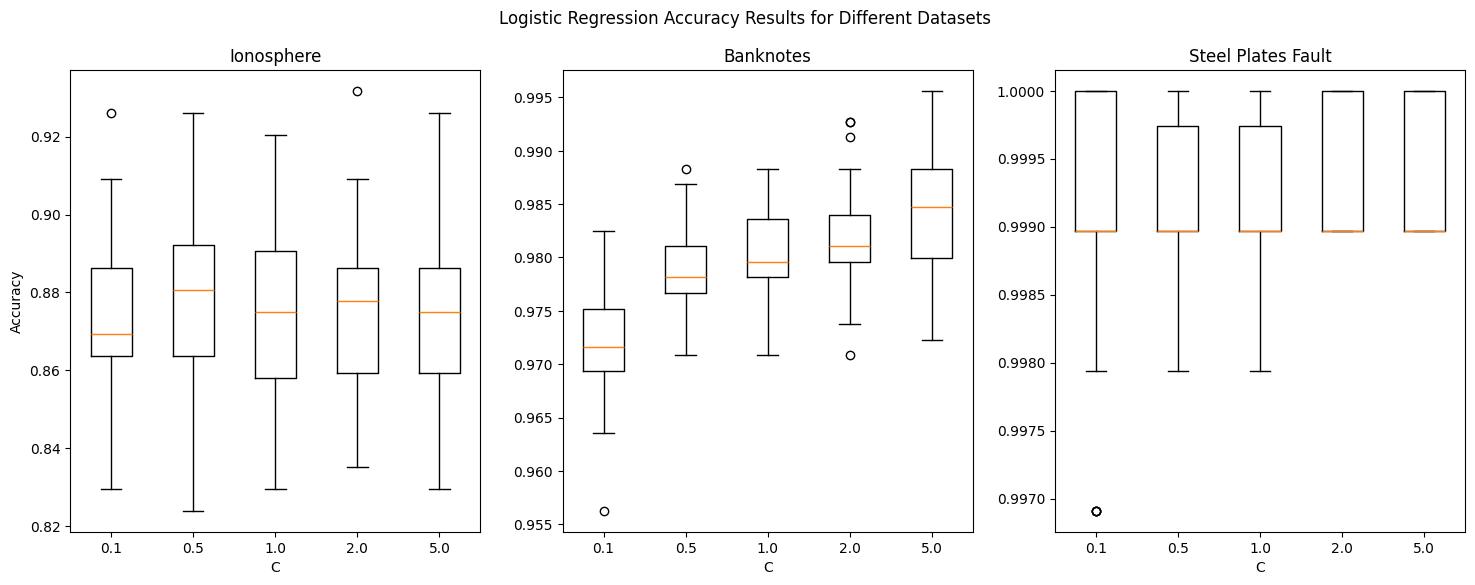

In [37]:
# Implement logistic regression on the data set

def logistic_regression(data, c):

    predictions_list = []

    for i in range(50):

        # Split into training and test set
        prepared_data = split_data(data, i)

        # Initialize the model
        lr = LogisticRegression(max_iter = 1000, C=c)

        # Train the model
        lr.fit(prepared_data['X_train'], prepared_data['y_train'])

        # Make predictions on test set
        y_pred = lr.predict(prepared_data['X_test'])

        # Evaluate the model
        accuracy = accuracy_score(prepared_data['y_test'], y_pred)
        predictions_list.append(accuracy)

    predictions_list.sort()
    print('mean:', 1-statistics.mean(predictions_list), c)
    return predictions_list

# Create lists to hold the results for later
ion_results = []
bn_results = []
spf_results = []

labels = [0.1, 0.5, 1.0, 2.0, 5.0]

# Populate the lists with results
for label in labels:
    ion_results.append(logistic_regression(ion_data_ready, label))
    bn_results.append(logistic_regression(bn_data_ready, label))
    spf_results.append(logistic_regression(spf_data_ready, label))

dict_results = {"ion": ion_results,
                "bn" : bn_results,
                "spf": spf_results}

draw_graphs(dict_results, labels, 'C', 'Logistic Regression Accuracy Results for Different Datasets')


mean: 0.08374999999999999
mean: 0.03623906705539359
mean: 0.0
mean: 0.0821590909090909
mean: 0.008950437317784221
mean: 0.0
mean: 0.1145454545454545
mean: 0.014752186588921301
mean: 0.0
mean: 0.11977272727272725
mean: 0.020962099125364397
mean: 0.0
mean: 0.12022727272727274
mean: 0.020174927113702612
mean: 0.0


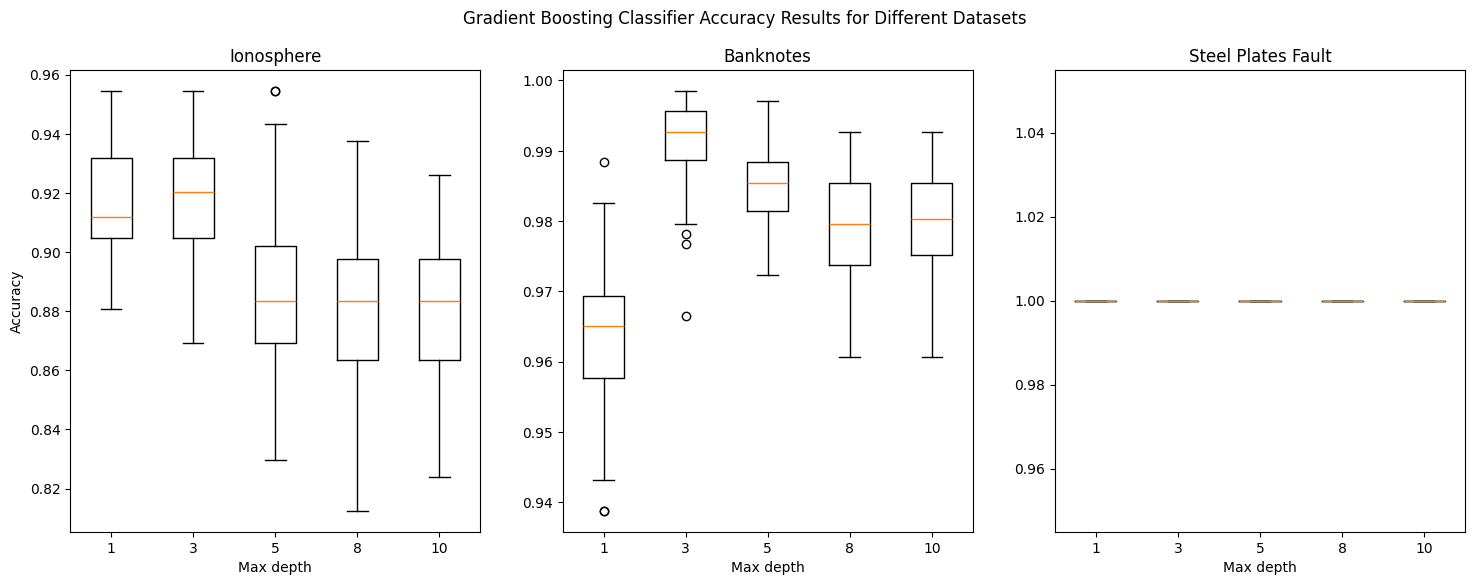

In [36]:
# Implement gradient boosting classifier on the data sets

def gradient_boosting_classifier(data, depth):

    predictions_list = []

    for i in range(50):

        prepared_data = split_data(data, i)

        # Standardize the features (mean=0, std=1)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(prepared_data['X_train'])
        X_test = scaler.transform(prepared_data['X_test'])

        # Initialize the Gradient Boosting Classifier
        gbc = GradientBoostingClassifier(max_depth=depth)

        # Train the model
        gbc.fit(X_train, prepared_data['y_train'])

        # Make predictions on the test set
        y_pred = gbc.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(prepared_data['y_test'], y_pred)
        predictions_list.append(accuracy)

    predictions_list.sort()
    print('mean:', 1-statistics.mean(predictions_list), depth)
    return predictions_list

# Create lists to hold the results for later
ion_results = []
bn_results = []
spf_results = []

labels = [1, 3, 5, 8, 10]

# Populate the lists with results
for label in labels:
    ion_results.append(gradient_boosting_classifier(ion_data_ready, label))
    bn_results.append(gradient_boosting_classifier(bn_data_ready, label))
    spf_results.append(gradient_boosting_classifier(spf_data_ready, label))


dict_results = {"ion": ion_results,
                "bn" : bn_results,
                "spf": spf_results}

draw_graphs(dict_results, labels, 'Max depth', 'Gradient Boosting Classifier Accuracy Results for Different Datasets')


mean: 0.08374999999999999
mean: 0.03623906705539359
mean: 0.0
mean: 0.0821590909090909
mean: 0.008921282798833863
mean: 0.0
mean: 0.11624999999999996
mean: 0.014868804664723068
mean: 0.0
mean: 0.12227272727272731
mean: 0.020437317784256503
mean: 0.0
mean: 0.1188636363636364
mean: 0.020029154518950376
mean: 0.0


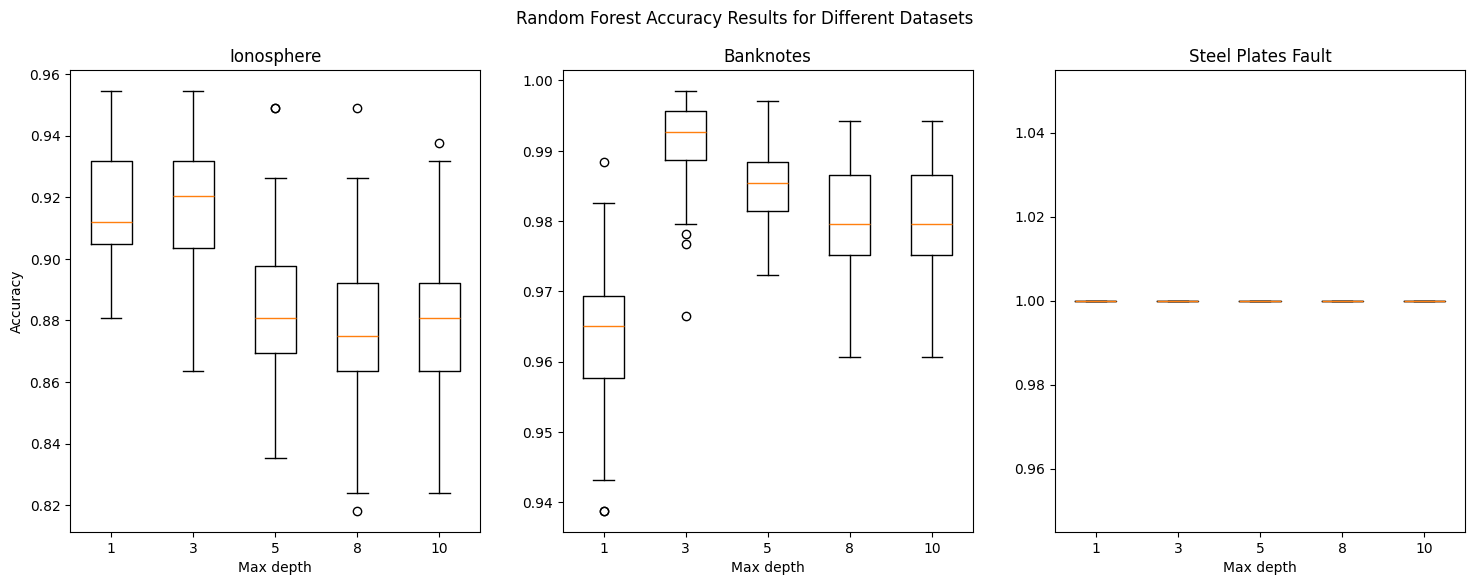

In [39]:
# Implement random forest classifier on the data sets

def random_forest_classifier(data, depth):

    predictions_list = []

    for i in range(50):

        prepared_data = split_data(data, i)

        # Initialize the Random Forest Classifier
        rf = RandomForestClassifier(max_depth=depth)

        # Train the model
        rf.fit(prepared_data['X_train'], prepared_data['y_train'])

        # Make predictions on the test set
        y_pred = rf.predict(prepared_data['X_test'])

        # Evaluate the model
        accuracy = accuracy_score(prepared_data['y_test'], y_pred)
        predictions_list.append(accuracy)

    predictions_list.sort()
    print('mean:', 1-statistics.mean(predictions_list), depth)
    return predictions_list


# Create lists to hold the results for later
ion_results = []
bn_results = []
spf_results = []

labels = [1, 3, 5, 8, 10]

# Populate the lists with results
for label in labels:
    ion_results.append(gradient_boosting_classifier(ion_data_ready, label))
    bn_results.append(gradient_boosting_classifier(bn_data_ready, label))
    spf_results.append(gradient_boosting_classifier(spf_data_ready, label))

dict_results = {"ion": ion_results,
                "bn" : bn_results,
                "spf": spf_results}

draw_graphs(dict_results, labels, 'Max depth', 'Random Forest Accuracy Results for Different Datasets')

mean: 0.10272727272727278
mean: 0.0002623906705538914
mean: 0.0013182286302780843
mean: 0.10193181818181818
mean: 0.0002915451895043608
mean: 0.0014418125643665958
mean: 0.10329545454545452
mean: 0.0014285714285714457
mean: 0.0011740473738414137
mean: 0.11795454545454542
mean: 0.03090379008746358
mean: 0.001112255406797158


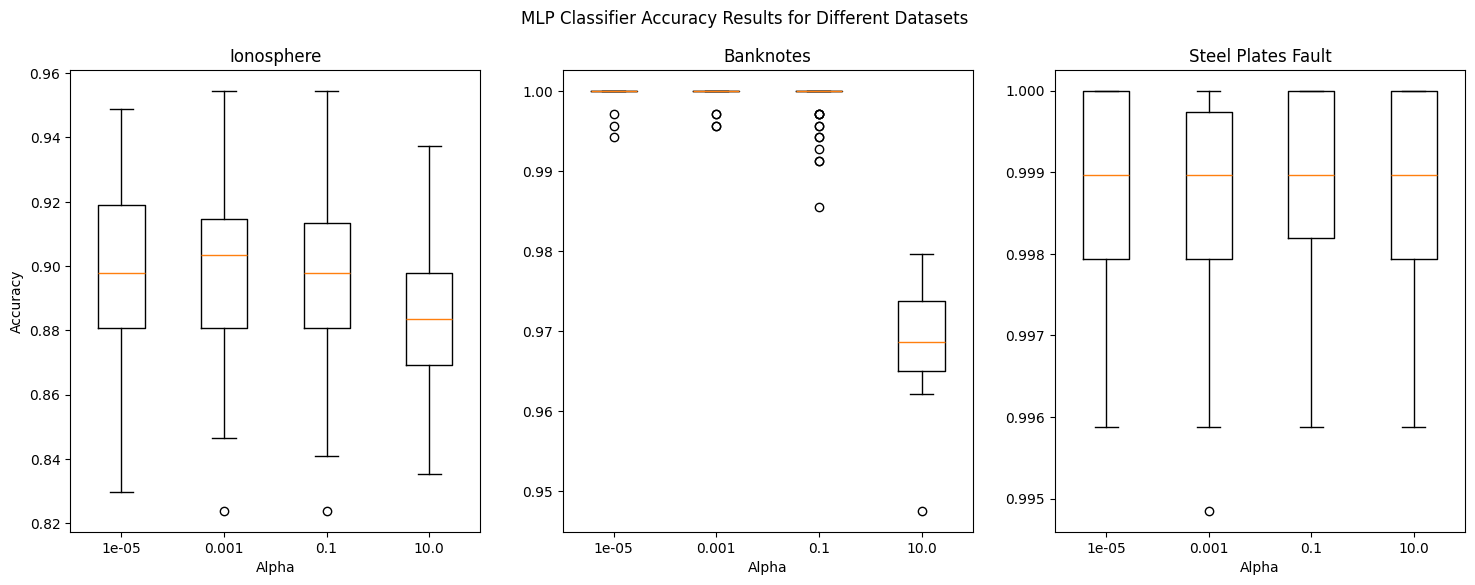

In [32]:
# Implement MLP classifier on the data sets

def random_forest_classifier(data, alpha):

    predictions_list = []

    for i in range(50):

        prepared_data = split_data(data, i)

        # Initialize the MLP Classifier
        mlp = MLPClassifier(max_iter=1000, alpha=alpha)

        # Train the model
        mlp.fit(prepared_data['X_train'], prepared_data['y_train'])

        # Make predictions on the test set
        y_pred = mlp.predict(prepared_data['X_test'])

        # Evaluate the model
        accuracy = accuracy_score(prepared_data['y_test'], y_pred)
        predictions_list.append(accuracy)

    predictions_list.sort()
    print('mean:', 1-statistics.mean(predictions_list), alpha)
    return predictions_list

# Create lists to hold the results for later
ion_results = []
bn_results = []
spf_results = []

labels = [1e-5, 1e-3, 0.1, 10.0]

# Populate the lists with results
for label in labels:
    ion_results.append(random_forest_classifier(ion_data_ready, label))
    bn_results.append(random_forest_classifier(bn_data_ready, label))
    spf_results.append(random_forest_classifier(spf_data_ready, label))

dict_results = {"ion": ion_results,
                "bn" : bn_results,
                "spf": spf_results}

draw_graphs(dict_results, labels, 'Alpha', 'MLP Classifier Accuracy Results for Different Datasets')